K-Means

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

df = pd.read_csv('../Laboratorio_A01706695/archive/cwurData.csv')
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,651,44.02,2015


Dividimos la base de datos por años y la guardamos en variables.

In [150]:
t2015 = df[(df['year']==2015)]

In [163]:
print("2015 \n",t2015.groupby('country').size(), "\n")

2015 
 country
Argentina                 3
Australia                27
Austria                  12
Belgium                  10
Brazil                   18
Bulgaria                  1
Canada                   33
Chile                     4
China                    83
Colombia                  2
Croatia                   1
Cyprus                    1
Czech Republic            5
Denmark                   5
Egypt                     4
Estonia                   1
Finland                   9
France                   49
Germany                  55
Greece                    7
Hong Kong                 6
Hungary                   6
Iceland                   1
India                    16
Iran                      8
Ireland                   8
Israel                    7
Italy                    47
Japan                    74
Lebanon                   1
Lithuania                 1
Malaysia                  3
Mexico                    2
Netherlands              13
New Zealand               6
Norwa

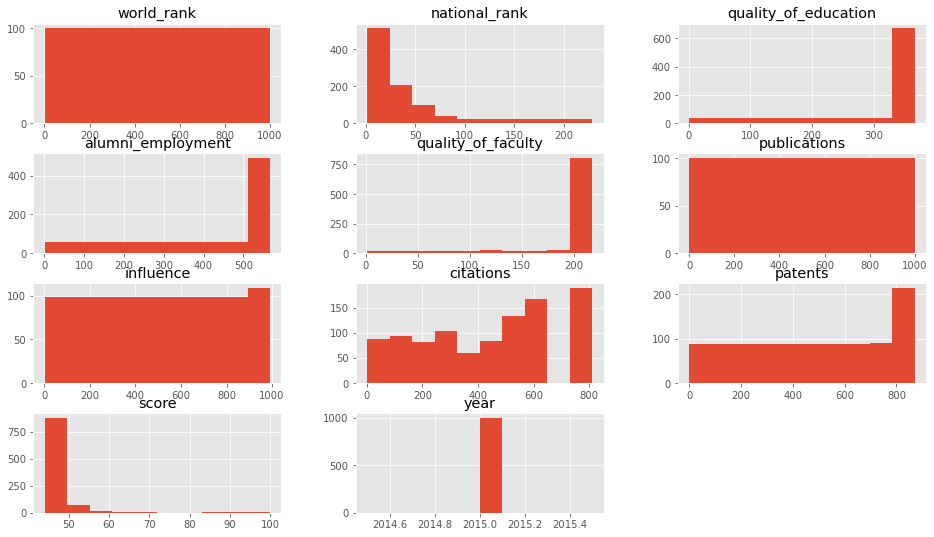

In [152]:
t2015.drop(['country'], axis='columns').hist()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

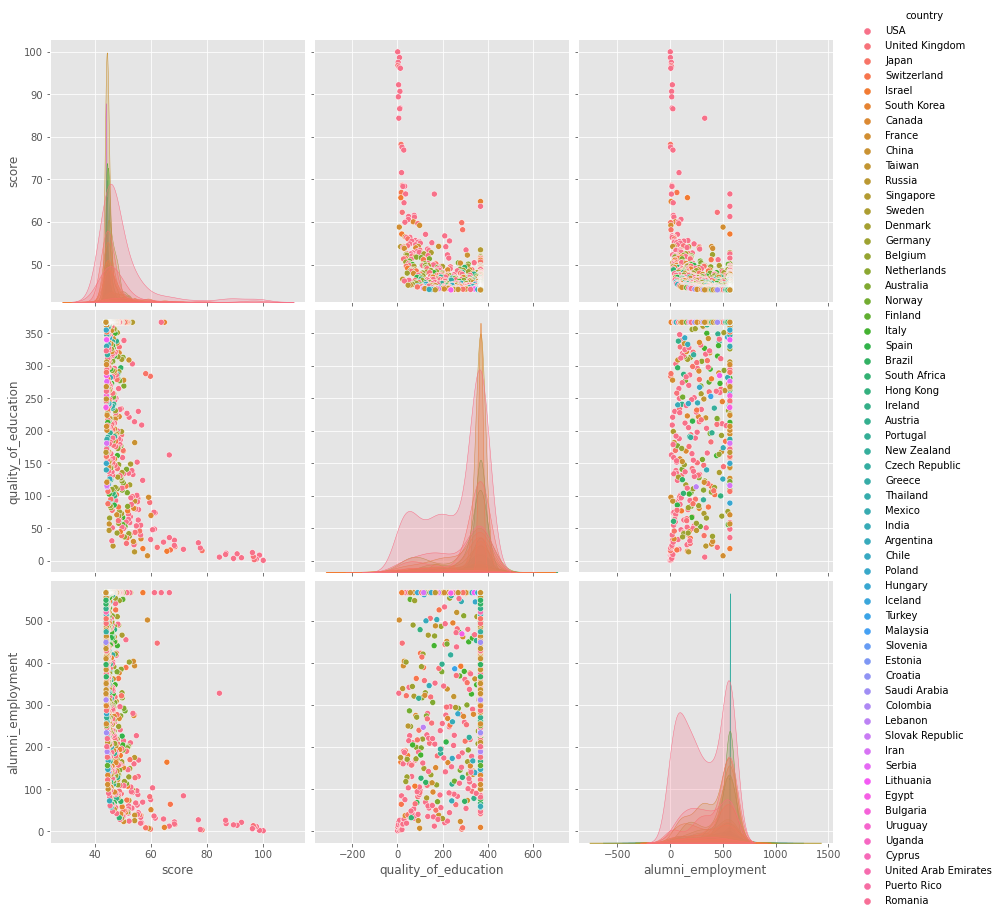

In [153]:
sb.pairplot(t2015.dropna(), hue='country', height=4, vars=["score","quality_of_education","alumni_employment"], kind='scatter')

In [154]:
X2015 = np.array(t2015[['score','quality_of_education','alumni_employment']])
y2015 = np.array(t2015['country'])
X2015.shape

(1000, 3)

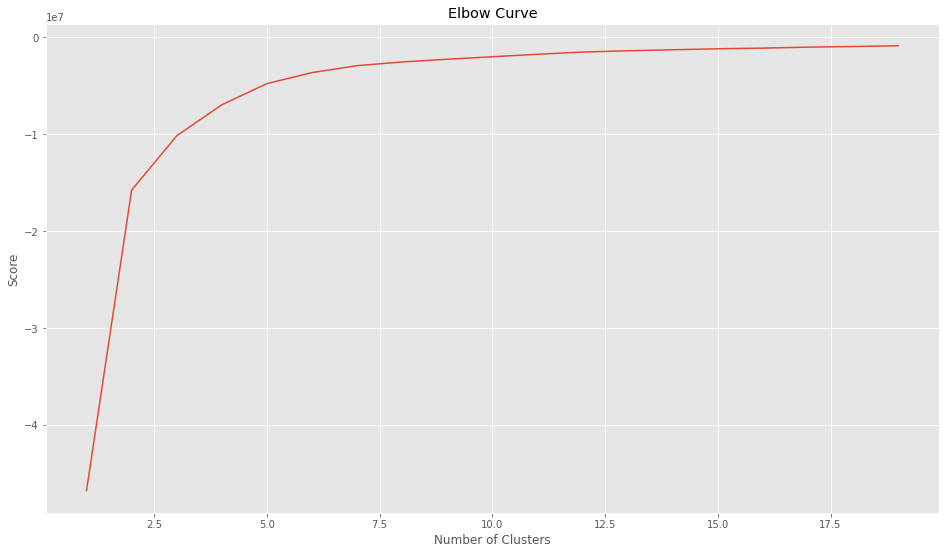

In [155]:
Nc2015 = range(1, 20)
kmeans2015 = [KMeans(n_clusters=i) for i in Nc2015]
#kmeans
score2015 = [kmeans2015[i].fit(X2015).score(X2015) for i in range(len(kmeans2015))]
#score
plt.plot(Nc2015,score2015)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [156]:
kmeans2015 = KMeans(n_clusters=5).fit(X2015)
centroids2015 = kmeans2015.cluster_centers_
print("2015 \n",centroids2015,"\n")

2015 
 [[ 44.78241164 361.02494802 556.1995842 ]
 [ 47.00218045 333.06015038 145.46616541]
 [ 56.24539683  90.76984127 114.64285714]
 [ 45.07248447 349.11180124 351.96273292]
 [ 47.76393939 143.88888889 490.36363636]] 



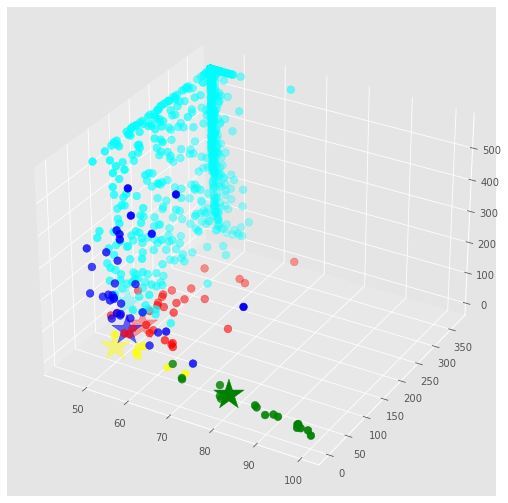

In [157]:
# Predicting the clusters in 2015
labels = kmeans.predict(X2015)
# Getting the cluster centers
C2015 = kmeans.cluster_centers_
colors=['red','green','blue','cyan','yellow']
assign=[]
for row in labels:
    assign.append(colors[row])

fig2015 = plt.figure()
ax2015 = plt.axes(projection='3d')
ax2015.scatter(X2015[:, 0], X2015[:, 1], X2015[:, 2], c=assign,s=60)
ax2015.scatter(C2015[:, 0], C2015[:, 1], C2015[:, 2], marker='*', c=colors, s=1000)

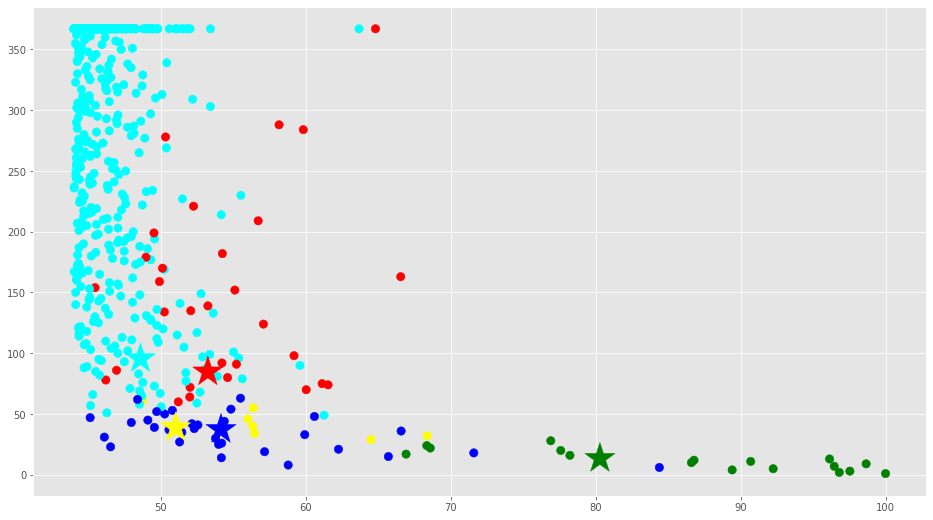

In [158]:

f1_2015 = t2015['score'].values
f2_2015 = t2015['quality_of_education'].values

plt.scatter(f1_2015, f2_2015, c=assign, s=70)
plt.scatter(C2015[:, 0], C2015[:, 1], marker='*', c=colors, s=1000)
plt.show()

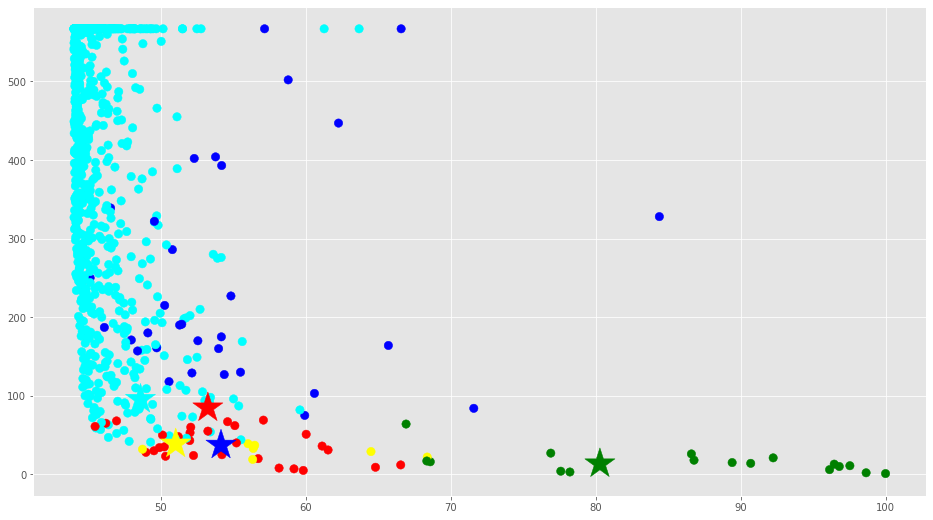

In [159]:
f1_2015 = t2015['score'].values
f2_2015 = t2015['alumni_employment'].values

plt.scatter(f1_2015, f2_2015, c=assign, s=70)
plt.scatter(C2015[:, 0], C2015[:, 1], marker='*', c=colors, s=1000)
plt.show()

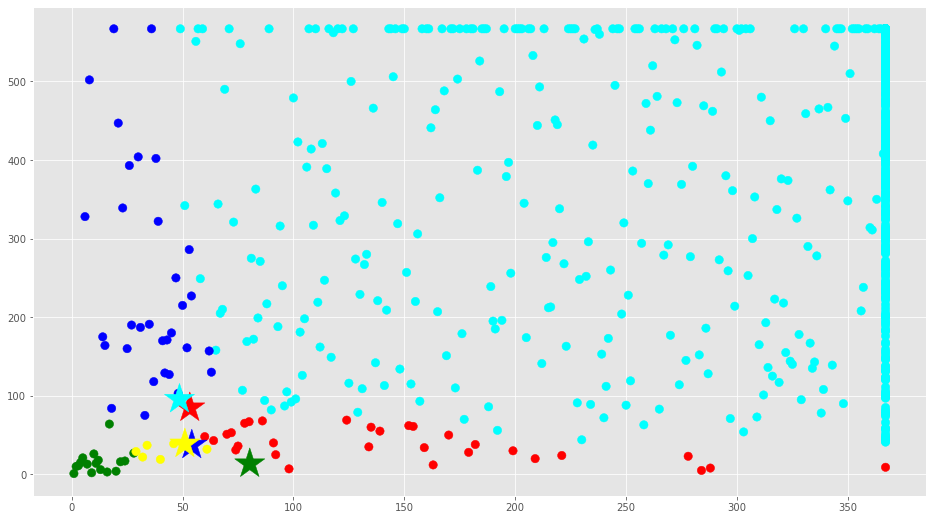

In [169]:
f1_2015 = t2015['quality_of_education'].values
f2_2015 = t2015['alumni_employment'].values

plt.scatter(f1_2015, f2_2015, c=assign, s=70)
plt.scatter(C2015[:, 0], C2015[:, 1], marker='*', c=colors, s=1000)
plt.show()

In [184]:
copy =  pd.DataFrame()
copy['user']=t2015['institution'].values
copy['category']=t2015['country'].values
copy['label'] = labels;
amountByGroup =  pd.DataFrame()
amountByGroup['color']=colors
amountByGroup['amount']=copy.groupby('label').size()
amountByGroup

,color,amount
0,red,30
1,green,17
2,blue,32
3,cyan,914
4,yellow,7


Resultados del grupo Red

In [183]:
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]
group_referrals.groupby('category').size()

category
Canada             1
China              1
France             2
Japan              3
South Korea        1
Spain              1
Sweden             1
Taiwan             1
USA               18
United Kingdom     1
dtype: int64

Resultados del grupo green

In [185]:
group_referrer_index = copy['label'] == 1
group_referrals = copy[group_referrer_index]
group_referrals.groupby('category').size()

category
Japan              2
Switzerland        1
USA               12
United Kingdom     2
dtype: int64

Resultados del grupo blue

In [186]:
group_referrer_index = copy['label'] == 2
group_referrals = copy[group_referrer_index]
group_referrals.groupby('category').size()

category
France             3
Germany            4
Israel             3
Japan              2
Norway             1
Russia             3
Switzerland        1
USA               11
United Kingdom     4
dtype: int64

Resultados del grupo cyan

In [187]:
group_referrer_index = copy['label'] == 3
group_referrals = copy[group_referrer_index]
group_referrals.groupby('category').size()

category
Argentina                 3
Australia                27
Austria                  12
Belgium                  10
Brazil                   18
Bulgaria                  1
Canada                   31
Chile                     4
China                    82
Colombia                  2
Croatia                   1
Cyprus                    1
Czech Republic            5
Denmark                   5
Egypt                     4
Estonia                   1
Finland                   9
France                   44
Germany                  51
Greece                    7
Hong Kong                 6
Hungary                   6
Iceland                   1
India                    16
Iran                      8
Ireland                   8
Israel                    4
Italy                    47
Japan                    66
Lebanon                   1
Lithuania                 1
Malaysia                  3
Mexico                    2
Netherlands              13
New Zealand               6
Norway     

Resultados del grupo yellow

In [188]:
group_referrer_index = copy['label'] == 4
group_referrals = copy[group_referrer_index]
group_referrals.groupby('category').size()

category
Canada          1
Japan           1
South Africa    1
USA             4
dtype: int64